In [9]:
import numpy as np
from numpy.linalg import norm
import cmath
import math
import matplotlib.pyplot as plt
from oracle import *
from grover_phase import *
try:
    from src.sparse_matrix import SparseMatrix
    from src.quantum_register import QuantumRegister
    from src.quantum_operator import Operator
    from src.operators import *
except:
    from sparse_matrix import SparseMatrix
    from quantum_register import QuantumRegister
    from quantum_operator import Operator
    from operators import *


class Grover:
    def __init__(self, n_qubits, target_state = None):
        self.n_qubits = n_qubits
        self.target_state = target_state
        self.qr = None
        self.D = None
        self.oricle = None

    def build_quantum_register(self):
        self.qr = QuantumRegister(self.n_qubits)
        return self.qr

    def print_register(self):
        print(self.qr)

    def init_register(self):
        h = H(self.n_qubits)
        x = X(self.n_qubits)
        h2 = H(self.n_qubits)
        empty_register = QuantumRegister(self.n_qubits)
        self.qr = h * self.qr
#         aux = h * x * empty_register
#         self.qr = self.qr * aux
        return self.qr

    def init_reflection_matrix(self):
        h = H(self.n_qubits)
        i = I()
        x = X(self.n_qubits)
#         cnot = CNOT(2*self.n_qubits)
        a = (h)
        b = (x)
        c = G_Phase(self.n_qubits)
        d = (x)
        e = (h)
        self.D = h * c * h
        return self.D

    def gen_oracle(self):
        self.oracle = Oracle(self.n_qubits)
        return self.oracle

    def run(self, k):
        # k is the number of tagged states
#         runs = round( ((math.pi / 4) / math.sqrt(k)) * 2**(self.n_qubits / 2)) 
        runs = round(math.sqrt(self.n_qubits/k))
#         print(runs)
        for i in range(runs):
            self.qr = self.oracle * self.qr
            self.qr = self.D * self.qr
            self.qr.normalize()
#             self.qr.plotRegister()
        result = self.qr.measure()
        return result


In [10]:
def runG():
    
    g = Grover(3)

    g.build_quantum_register()

    g.init_register()

    g.init_reflection_matrix()

    g.gen_oracle()

    
    
    return g.run(2)

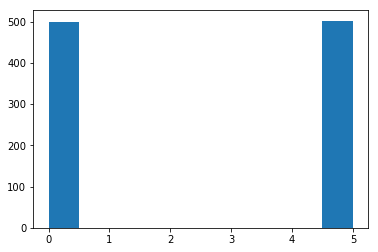

In [11]:
x = []

for i in range(0,1000):
    
    x.append(runG())
    

# print(x)

bins = np.arange(0, max(x) + 1.5) - 0.5

x = np.array(x)

plt.hist(x)
plt.show()

In [2]:
test = QuantumRegister(3,[1,1,1,1,1,1,1,1])

o = Oracle(3)

print(o*test)

(-0.35+0.00j)*|000> (+0.35+0.00j)*|001> (+0.35+0.00j)*|010> (+0.35+0.00j)*|011> (+0.35+0.00j)*|100> (-0.35+0.00j)*|101> (+0.35+0.00j)*|110> (+0.35+0.00j)*|111> 
